In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

metric_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Convert pandas dataframe to numpy array
x_train = X

# Scale data to have zero mean and unit variance
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

In [3]:
# This is the dimension of the original space
input_dim = 4

# This is the dimension of the latent space (encoding space)
latent_dim = 2

encoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [4]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer='adam')

/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


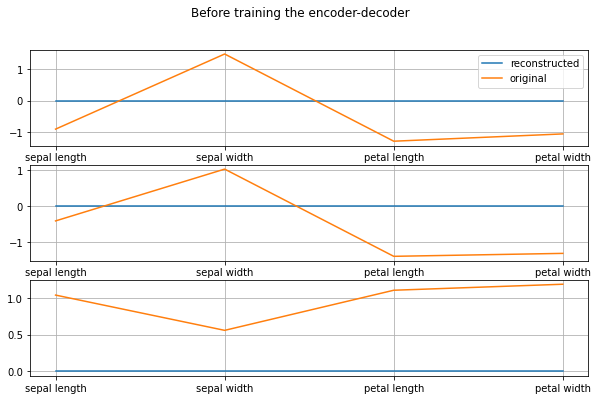

In [5]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(metric_names)
        plt.xticks(np.arange(0, 4, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

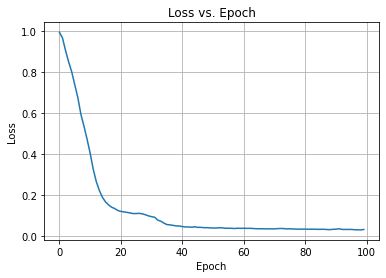

In [6]:
model_history = autoencoder.fit(x_train, x_train, epochs=100, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/home/lucasb/anaconda3/envs/inventory/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


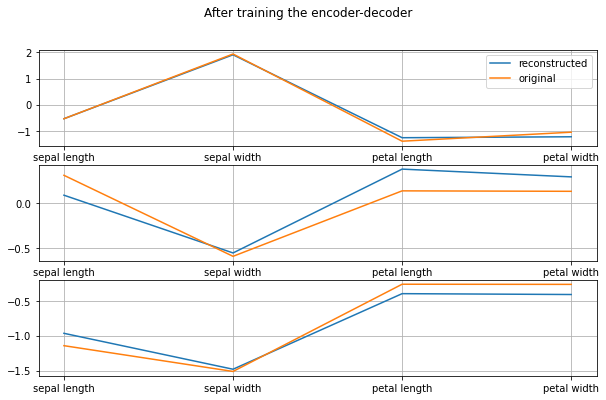

In [7]:
plot_orig_vs_recon('After training the encoder-decoder')